In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [93]:
# read in data
df = pd.read_csv("./data/Texas_COVID_data.csv")
df['Day'] = np.arange(1, len(df) + 1)
df.drop('Date', axis = 1, inplace=True)

# reformat names nicely
for name in df.columns:
    if '\n' in name:
        lst = name.split('\n')
        new_name = ''.join(lst).strip()
        df = df.rename(columns = {name: new_name})

# convert strings to int
for name in df.columns:
    if isinstance(df[name][0], str):
        df[name] = df[name].str.replace(',', '')
        df[name] = df[name].astype(int)

        
# this one is a real stinker so do manually
df = df.rename(columns={'Fatalitiesby Dateof Death':'FatalitiesByDateofDeath'})

In [94]:
df.head()

,CumulativeCases,CumulativeFatalities,DailyNewCases,FatalitiesByDateofDeath,Day
0,0,0,0,0,1
1,0,0,0,0,2
2,5,0,5,0,3
3,5,0,0,0,4
4,5,0,0,0,5


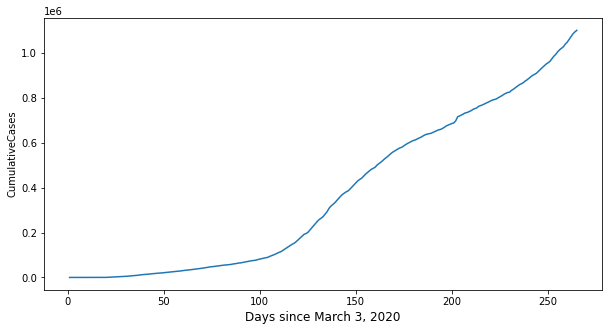

In [98]:
plt.figure(figsize=(10, 5))  # Increase the size of the plot for better visibility
sns.lineplot(x=df['Day'], y=df['CumulativeCases']);
plt.xlabel("Days since March 3, 2020", fontsize=12);

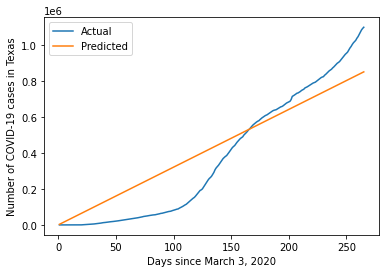

In [110]:
model = LinearRegression(fit_intercept=False)
model.fit(df[['Day']], y)
preds = model.predict(df[['Day']])

# Plot actual and predicted

sns.lineplot(x=df['Day'], y=df['CumulativeCases'], label="Actual");
sns.lineplot(x=df['Day'], y = preds, label='Predicted')

plt.xlabel("Days since March 3, 2020")
plt.ylabel("Number of COVID-19 cases in Texas")
plt.legend()
plt.show()

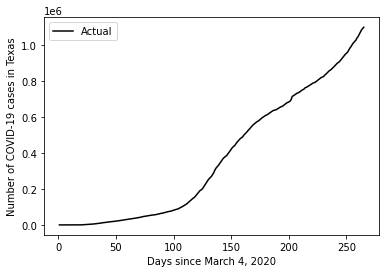

In [116]:
# The AutoReg model handles lags internally, but you can also create them manually if needed for other analyses.
model_ar = AutoReg(y, lags=1, old_names=False)
res_ar = model_ar.fit()
preds_ar = res_ar.predict(start=1, end=len(y))

# Plotting actual and predicted values
sns.lineplot(x = df['Day'], y = df['CumulativeCases'], label="Actual", color='black')
sns.lineplot(x = df['Day'], y = preds_ar, label="AR Predicted", color='blue')

plt.xlabel("Days since March 4, 2020")
plt.ylabel("Number of COVID-19 cases in Texas")
plt.legend()
plt.show()


In [117]:
y_true = y[2:] # Adjusting the index for comparison
y_pred = preds_ar[1:-1] # Adjusting the index for comparison

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
me = np.mean(y_true - y_pred)
mape = np.mean(np.abs(y_true - y_pred) * 100 / y_true)

print(f"MSE: {mse}, MAE: {mae}, ME: {me}, MAPE: {mape}")


MSE: 7243556.721982665, MAE: 2069.7976911701226, ME: 7.3566292402489, MAPE: 762.9042995798184


In [119]:
k_minus1 = 4
moving = np.mean(y[-k_minus1:])

# Exponential smoothing
alpha = 0.3
moving_pre = np.mean(y[-1-k_minus1:-1])
expo_low_alpha = alpha * df['CumulativeCases'].iloc[-1] + (1 - alpha) * moving_pre

alpha = 0.7
expo_high_alpha = alpha * df['CumulativeCases'].iloc[-1] + (1 - alpha) * moving_pre

print(f"Exponential Smoothing with alpha=0.3: {expo_low_alpha}")
print(f"Exponential Smoothing with alpha=0.7: {expo_high_alpha}")


Exponential Smoothing with alpha=0.3: 1085100.7249999999
Exponential Smoothing with alpha=0.7: 1094174.025
